# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
raw = df.copy()

In [4]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11021,0,0.000000,0,0.0,11,357.000000,0.018182,0.036364,0.000000,0.0,Dec,2,2,7,2,Returning_Visitor,True,False
1124,0,0.000000,0,0.0,3,514.000000,0.000000,0.066667,0.000000,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
5381,7,52.400000,3,202.5,55,1995.466667,0.003333,0.025397,1.831500,0.0,May,2,2,6,13,Returning_Visitor,False,False
9826,0,0.000000,0,0.0,16,423.183333,0.012500,0.016071,0.000000,0.0,Nov,3,2,7,10,Returning_Visitor,False,False
384,9,213.321429,5,528.0,61,2258.430586,0.010000,0.020655,2.810812,0.0,Mar,1,1,4,2,Returning_Visitor,False,False


# Data Cleaning <br>

## Missing values

In [5]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ada feature yang memiliki data hilang.

## Duplicated data

In [6]:
print(f'Jumlah row duplicated sebelum dihapus: {df.duplicated().sum()}')

# drop duplicated rows
df.drop_duplicates(inplace=True)   # keep = 'First'
print(f'Jumlah row duplicated SETELAH dihapus: {df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus: 125
Jumlah row duplicated SETELAH dihapus: 0


In [7]:
# persentase data duplicate yang di drop

print(f'Jumlah row dataset setelah drop row duplicated: {len(df)}')
print(f'Persentase drop data duplicate: {round(((len(raw)-len(df))/len(raw))*100, 2)}%')


Jumlah row dataset setelah drop row duplicated: 12205
Persentase drop data duplicate: 1.01%


In [8]:
no_duplicates = df.copy()

* Dataset memiliki 125 row duplicated (1.01% data asli).
* Menghindari redundan info, dilakukan drop duplicates, sehingga total row pada dataset: 12205

## Outliers

In [9]:
# pakai raw data
# df = raw.copy()

# pakai data tanpa nilai duplicate
df = no_duplicates.copy()

In [10]:
# pengelompokkan berdasarkan jenisnya
numericals   = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
timestamps   = ['Month']

In [11]:
### outlier check

# IQR function 
def IQR(x):
  q1 = np.percentile(x, 25)
  q3 = np.percentile(x, 75)
  
  bb = q1 - 1.5*(q3 - q1)
  ba = q3 + 1.5*(q3 - q1)

  outlier_indices = list(x.index[(x < bb) | (x > ba)])
  outlier_values = list(x[outlier_indices])

  return len(outlier_indices)

# IQR Method
for i in numericals:
  print(f'Jumlah outlier IQR {i}: {IQR(df[i])}')

Jumlah outlier IQR Administrative: 404
Jumlah outlier IQR Administrative_Duration: 1149
Jumlah outlier IQR Informational: 2631
Jumlah outlier IQR Informational_Duration: 2405
Jumlah outlier IQR ProductRelated: 1007
Jumlah outlier IQR ProductRelated_Duration: 951
Jumlah outlier IQR BounceRates: 1428
Jumlah outlier IQR ExitRates: 1325
Jumlah outlier IQR PageValues: 2730
Jumlah outlier IQR SpecialDay: 1249


Seluruh feature numerical memiliki outlier dengan jumlah yang cukup besar dengan 3 feature terbesar: PageValues (2730), Informational (2631), dan Informational_Duration (2405).

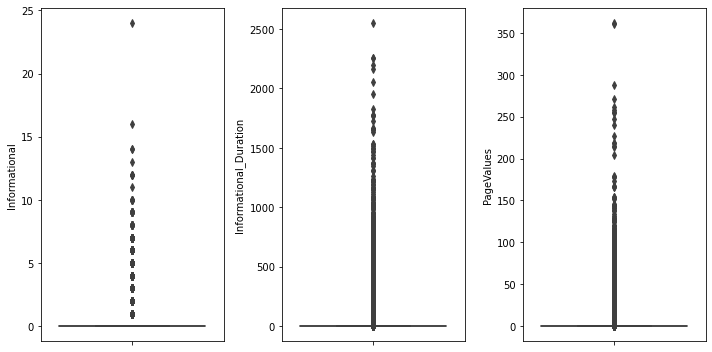

In [12]:
# cek boxplot
rcParams['figure.figsize'] = 10, 5

nodist = ['Informational', 'Informational_Duration', 'PageValues']
for i in range (0, len (nodist)):
    plt.subplot (1, 3, i+1)
    sns.boxplot (y = df[nodist[i]], orient = 'v')
    plt.tight_layout()

Data berkumpul cukup banyak pada nilai nol, tidak terlihat distribusi dari masing-masing feature.

### Log Transformation <br>

In [13]:
df[nodist].skew()

Informational             4.014173
Informational_Duration    7.540291
PageValues                6.350983
dtype: float64

Nilai skew ketiga feature tersebut positif. Dapat ditinjau log transformationnya.

C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


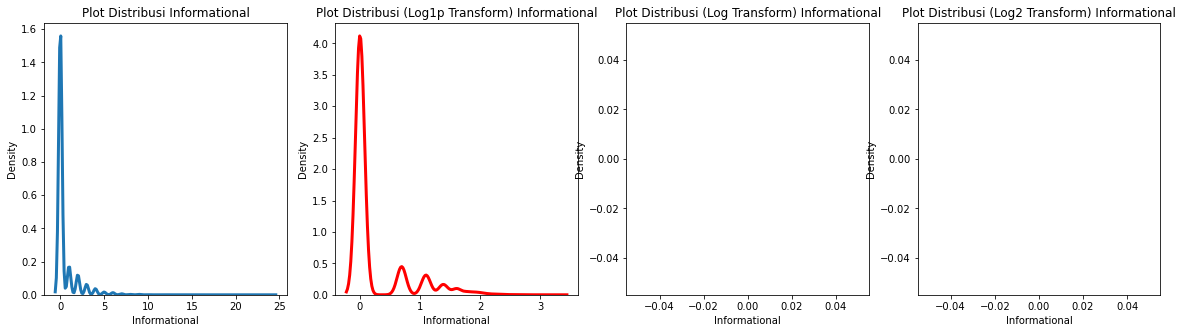

C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x360 with 0 Axes>

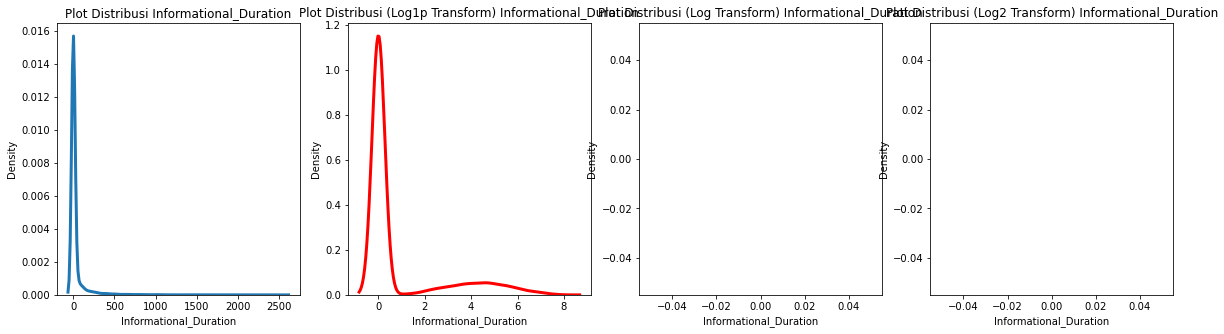

C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x360 with 0 Axes>

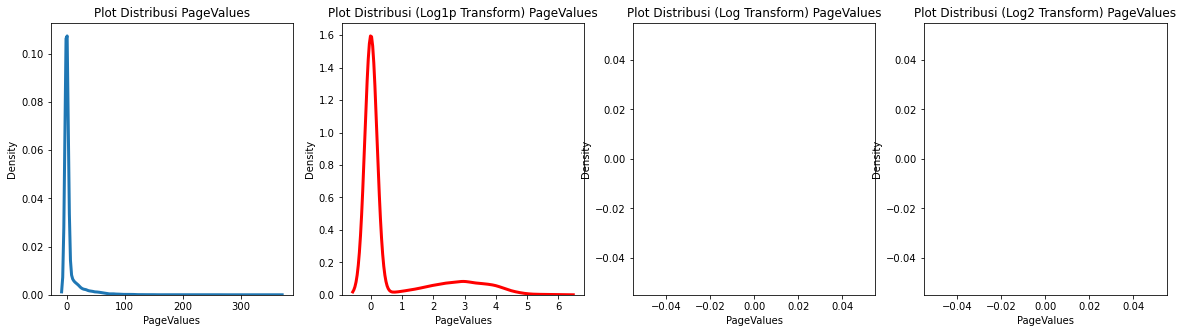

<Figure size 1440x360 with 0 Axes>

In [14]:
# displot untuk feature numericals

rcParams['figure.figsize'] = 20, 5
for i in range (0, len (nodist)):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    sns.kdeplot(x = df[nodist[i]], ax = ax1, linewidth = 3).set(title = f'Plot Distribusi {nodist[i]}')
    sns.kdeplot(np.log1p(df[nodist[i]]), ax = ax2, color = 'red', linewidth = 3).set(title = f'Plot Distribusi (Log1p Transform) {nodist[i]}')
    sns.kdeplot(np.log(df[nodist[i]]), ax = ax3, color = 'red', linewidth = 3).set(title = f'Plot Distribusi (Log Transform) {nodist[i]}')
    sns.kdeplot(np.log2(df[nodist[i]]), ax = ax4, color = 'red', linewidth = 3).set(title = f'Plot Distribusi (Log2 Transform) {nodist[i]}')
    plt.show()
    plt.tight_layout()
    fig.tight_layout(pad = 7)

Hasil Log-Transformation untuk feature Informational_Duration dan PageValues menyerupai normal distribution. Namun transform menggunakan Log dan Log2 tidak berhasil untuk nilai data nol. Dipilih Log1p-Transformation.

In [15]:
# log transformation
df['log_Informational'] = np.log1p(df['Informational'])
df['log_Informational_Duration'] = np.log1p(df['Informational_Duration'])
df['log_PageValues'] = np.log1p(df['PageValues'])

In [16]:
# IQR Method
log = ['log_Informational', 'log_Informational_Duration', 'log_PageValues']
for i in log:
  print(f'Jumlah outlier IQR {i}: {IQR(df[i])}')

Jumlah outlier IQR log_Informational: 2631
Jumlah outlier IQR log_Informational_Duration: 2405
Jumlah outlier IQR log_PageValues: 2730


Jumlah outlier tidak berkurang setelah dilakukan Log1p-Transformation

In [17]:
# library: 
from scipy import stats

z_score = df.copy()

print(f'Jumlah baris sebelum memfilter outlier: {len(z_score)}')

filtered_entries = np.array([True] * len(z_score))  # array kosong dengan nilai awal True
for col in numericals:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
z_score = z_score[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(z_score)}')
print(f'Persentase drop data outliers: {round(((len(df)-len(z_score))/len(df))*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020
Persentase drop data outliers: 17.9%


In [18]:
df.max()

Administrative                               27
Administrative_Duration                 3398.75
Informational                                24
Informational_Duration                 2549.375
ProductRelated                              705
ProductRelated_Duration             63973.52223
BounceRates                                 0.2
ExitRates                                   0.2
PageValues                           361.763742
SpecialDay                                  1.0
Month                                       Sep
OperatingSystems                              8
Browser                                      13
Region                                        9
TrafficType                                  20
VisitorType                   Returning_Visitor
Weekend                                    True
Revenue                                    True
log_Informational                      3.218876
log_Informational_Duration             7.843996
log_PageValues                         5

In [19]:
# drop data hasil log transformation
df = df.drop(columns = log).copy()

* Persentase outliers yang didrop (17.9% > 5%) sangat besar.
* Tidak dilakukan drop outliers, sehingga jumlah row tetap 12205.
* Hal tersebut juga didukung oleh informasi pada dataset yang diperoleh melalui google analytics. Pada nilai maksimumnya, nilai tersebut masih memiliki makna. Sebagai contoh pada Informational_Duration mungkin terjadi saat user/pengunjung membuka lalu membiarkan halaman tersebut tetap terbuka pada devicenya. Namun tentu, tidak dapat diketahui pasti status dari outlier yang terdapat pada data.
* Adanya outliers pada data perlu menjadi catatan saat pemodelan. 

## Feature Transformation

### Standardization

In [20]:
df[numericals].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [21]:
# library
from sklearn.preprocessing import StandardScaler#, MinMaxScaler

# standardization data
for i in numericals:
  
  # standardization
  df[f'{i}_std'] = StandardScaler().fit_transform(df[i].values.reshape(len(df), 1))

  # normalization data
  #df[f'{i}_norm'] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df), 1))

In [22]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ProductRelated_Duration_std,BounceRates_std,ExitRates_std,PageValues_std,SpecialDay_std
8624,0,0.0,0,0.0,4,73.500000,0.000000,0.050000,0.000000,0.0,...,-0.702302,-0.460019,-0.398824,-0.246257,-0.628941,-0.590502,-0.450137,0.184884,-0.318962,-0.310240
10138,0,0.0,0,0.0,4,156.500000,0.000000,0.050000,0.000000,0.0,...,-0.702302,-0.460019,-0.398824,-0.246257,-0.628941,-0.547262,-0.450137,0.184884,-0.318962,-0.310240
122,0,0.0,2,75.0,14,442.333333,0.000000,0.034375,0.000000,0.8,...,-0.702302,-0.460019,1.169109,0.284082,-0.404685,-0.398354,-0.450137,-0.153606,-0.318962,3.696611
3706,2,132.0,0,0.0,6,1564.000000,0.044444,0.066667,0.000000,0.0,...,-0.101756,0.283707,-0.398824,-0.246257,-0.584090,0.185993,0.531983,0.545941,-0.318962,-0.310240
9266,3,89.5,0,0.0,48,1572.200000,0.017687,0.038885,20.113927,0.0,...,0.198517,0.044250,-0.398824,-0.246257,0.357787,0.190265,-0.059293,-0.055896,0.759364,-0.310240


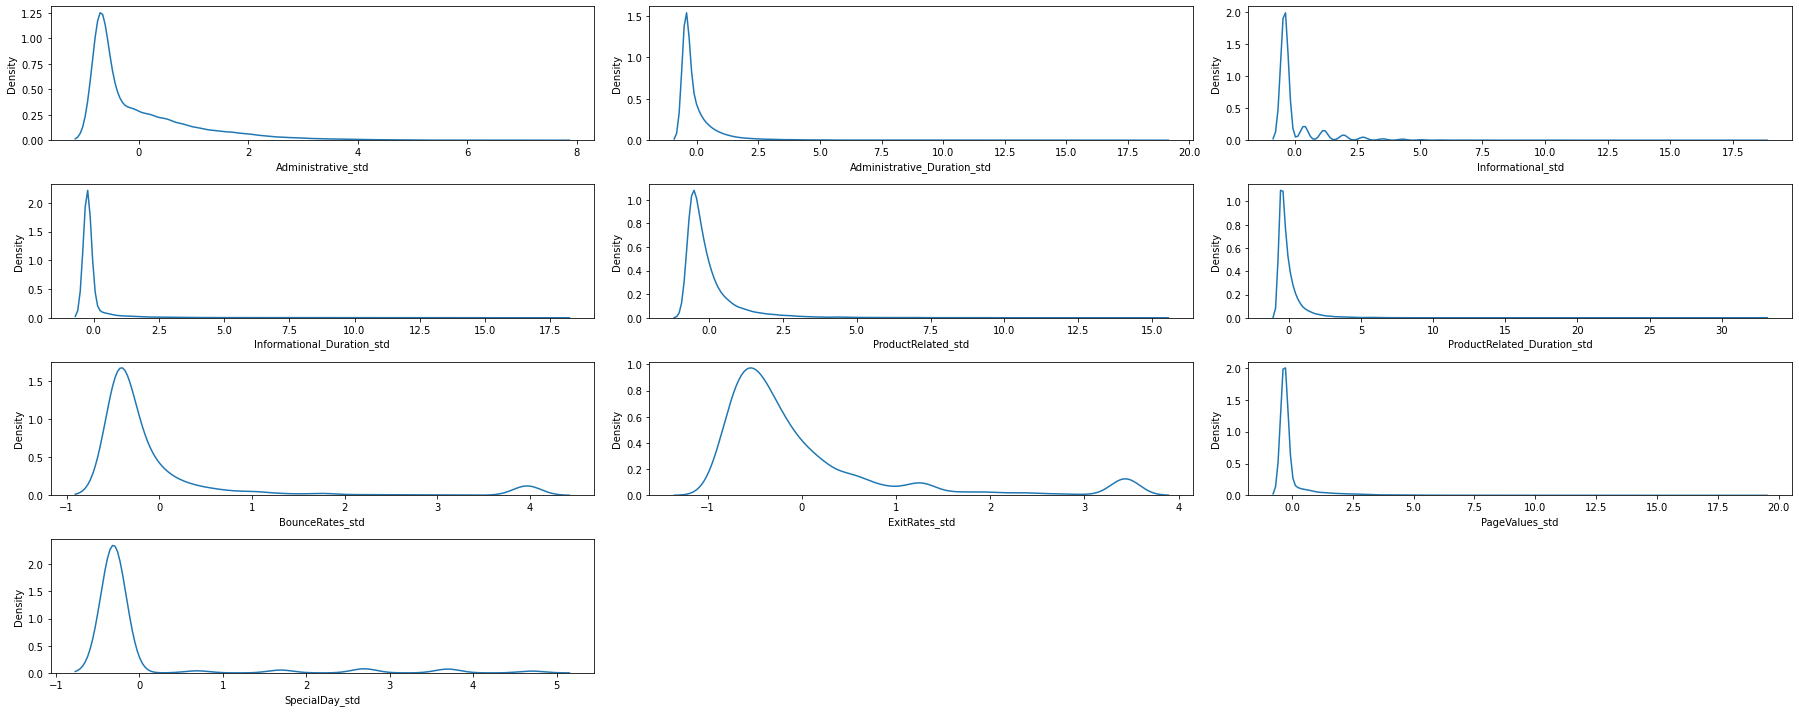

In [23]:
std = ['Administrative_std', 'Administrative_Duration_std', 
       'Informational_std', 'Informational_Duration_std',
       'ProductRelated_std', 'ProductRelated_Duration_std',
       'BounceRates_std', 'ExitRates_std', 'PageValues_std','SpecialDay_std']
rcParams['figure.figsize'] = 25, 10
for i in range (0, len (std)):
  plt.subplot (4, 3, i+1)
  sns.kdeplot (x = df[std[i]])
  plt.tight_layout()

In [24]:
df[std].describe()

,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ProductRelated_Duration_std,BounceRates_std,ExitRates_std,PageValues_std,SpecialDay_std
count,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04
mean,-7.238963e-16,-1.978380e-15,5.958700e-15,1.815444e-15,-8.012526e-16,-4.081855e-16,-2.538831e-15,3.766299e-16,-3.137679e-15,-2.391687e-15
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-7.023024e-01,-4.600193e-01,-3.988242e-01,-2.462572e-01,-7.186438e-01,-6.287930e-01,-4.501371e-01,-8.982857e-01,-3.189623e-01,-3.102396e-01
25%,-7.023024e-01,-4.600193e-01,-3.988242e-01,-2.462572e-01,-5.392387e-01,-5.282472e-01,-4.501371e-01,-5.899945e-01,-3.189623e-01,-3.102396e-01
50%,-4.020291e-01,-4.093107e-01,-3.988242e-01,-2.462572e-01,-3.149824e-01,-3.115564e-01,-3.860858e-01,-3.567007e-01,-3.189623e-01,-3.102396e-01
75%,4.987907e-01,7.354819e-02,-3.988242e-01,-2.462572e-01,1.335304e-01,1.407497e-01,-8.184213e-02,1.530263e-01,-3.189623e-01,-3.102396e-01
max,7.405076e+00,1.868953e+01,1.841638e+01,1.778084e+01,1.509143e+01,3.269903e+01,3.969402e+00,3.434394e+00,1.907553e+01,4.698324e+00


In [25]:
# dataset dengan std
df_std = df.copy()

# dataset tanpa kolom standardization (std)
df = df.drop(columns = std).copy()

## Feature Encoding

Pada dataset, terdapat:
* 6 categoricals: Month, OperatingSystems, Browser, Region, TrafficType, dan VisitorType
* 2 boolean: Weekend, Revenue

Akan dilakukan:
* Label encoding untuk Revenue dan Weekend (False: 0, True: 1)
* One hot encoding untuk Visitor Type
* (+ One hot encoding untuk OperationgSystems, Browser, Region, dan TrafficType)

### Label Encoding (Revenue, Weekend)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [27]:
# library
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df['Revenue'] = LabelEncoder().fit_transform(df['Revenue'])
df['Weekend'] = LabelEncoder().fit_transform(df['Weekend'])

# label encoding for weekend (categorical: ordinal)
mapping_month = {'Jan' : 1, 'Feb' : 2,
                 'Mar' : 3, 'Apr' : 4,
                 'May' : 5, 'June' : 6,
                 'Jul' : 7, 'Aug' : 8,
                 'Sep' : 9, 'Oct' : 10,
                 'Nov' : 11, 'Dec' : 12}
df['Month'] = df['Month'].map(mapping_month)

### One Hot Encoding (VisitorType)

In [28]:
# ubah feature VisitorType ke dalam feature dummies dengan prefix VT
onehot = pd.get_dummies(df['VisitorType'], prefix = 'VT')
df = df.join(onehot)

# drop feature VisitorType
df = df.drop(['VisitorType'], axis = 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

### One Hot Encoding (OperatingSystems, Browser, Region, dan TrafficType) <br>
Pada feature di atas, valuesnya merupakan bilang integer bulat yang masing-masing mewakilkan nilai categorical. Nilai tersebut tidak meiliki keurutan, sehingga untuk menghindari adanya penyalahartian saat pemodelan, dapat dilakukan one hot encoding.

In [30]:
df_others = df.copy()

In [31]:
others = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']
df[others].nunique()

OperatingSystems     8
Browser             13
Region               9
TrafficType         20
dtype: int64

Keempat feature di atas memiliki nilai unique yang cukup banyak. Akan dilihat distribusi nilai unik untuk setiap featurenya.

In [32]:
# persebaran feature 3 teratas
sum = 0
for col in others:
    print(f'value count kolom {col}:')
    print(df_others[col].value_counts().head(3))
    sum = df_others[col].value_counts().head(3).sum()
    print(f'others: {round(((len(df_others)-sum)/len(df_others))*100, 2)}%')
    print()

value count kolom OperatingSystems:
2    6541
1    2549
3    2530
Name: OperatingSystems, dtype: int64
others: 4.79%

value count kolom Browser:
2    7883
1    2427
4     731
Name: Browser, dtype: int64
others: 9.54%

value count kolom Region:
1    4714
3    2379
4    1171
Name: Region, dtype: int64
others: 32.29%

value count kolom TrafficType:
2    3911
1    2388
3    2013
Name: TrafficType, dtype: int64
others: 31.9%



In [33]:
# membuat feature others untuk nilai unik dengan frekuensi kecil

df_others['OperatingSystems'] = np.where(df_others['OperatingSystems'].isin([1, 2, 3]), df_others['OperatingSystems'], 'Others')
df_others['Browser'] = np.where(df_others['Browser'].isin([1, 2]), df_others['Browser'], 'Others')
# df_others['Region'] = np.where(df_others['Region'].isin([1, 2, 3, 4, 6, 7]), df_others['Region'], 'Others')
# df_others['TrafficType'] = np.where(df_others['TrafficType'].isin([1, 2, 3, 4, 13, 10, 6]), df_others['TrafficType'], 'Others')

Feature Region dan TrafficType memiliki nilai unique beserta frekuensinya yang cukup banyak, sehingga apabila dilakukan pemisahan others, menjadi rancu. Sementara apabila dilakukan one hot encoding, akan menghasilkan jumlah kolom baru yang sangat banyak.

In [34]:
for col in ['OperatingSystems', 'Browser']:
    print(f'value count kolom {col}:')
    print(df_others[col].value_counts())
    print()

value count kolom OperatingSystems:
2         6541
1         2549
3         2530
Others     585
Name: OperatingSystems, dtype: int64

value count kolom Browser:
2         7883
1         2427
Others    1895
Name: Browser, dtype: int64



In [35]:
# one hot encoding untuk OperatingSystems, Browser
for change in ['OperatingSystems', 'Browser']:
  onehots = pd.get_dummies(df_others[change], prefix = change)
  df_others = df_others.join(onehots)

# drop kolom kategori yang asli (karena sudah di-encoding)
df_others = df_others.drop(columns = ['OperatingSystems', 'Browser']).copy()

In [36]:
df_others.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  Region                   12205 non-null  int64  
 12  TrafficType              12205 non-null  int64  
 13  Weekend                  12205 non-null  int64  
 14  Revenue               

## Class Imbalance

In [37]:
df_processed = df.copy()
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [38]:
# persentase nilai target
df_processed.Revenue.value_counts(normalize = True)*100

0    84.367063
1    15.632937
Name: Revenue, dtype: float64

Proporsi dari feature Revenue 84.4% : 15.6%. <br>
Degree of imbalance: Moderate

In [39]:
# library
from imblearn import under_sampling,over_sampling

def balance (df):
  X = df.drop(['Revenue'], axis = 1) # features
  Y = df['Revenue'] # label
  
  # imbalance before
  print('BEFORE imbalance hamdling')
  print(pd.Series(Y).value_counts())
  print('')

  # undersampling
  X_under, Y_under = under_sampling.RandomUnderSampler().fit_resample(X, Y)
  print('AFTER undersampling')
  print(pd.Series(Y_under).value_counts())
  print('')

  # oversampling
  X_over, Y_over = over_sampling.RandomOverSampler().fit_resample(X, Y)
  print('AFTER oversampling')
  print(pd.Series(Y_over).value_counts())
  print('')

  # smote (oversampling)
  X_over_smote, Y_over_smote = over_sampling.SMOTE().fit_resample(X, Y)
  print('AFTER oversampling (smote)')
  print(pd.Series(Y_over_smote).value_counts())

* Data hasil cleaning: df_processed
* Dilakukan imbalance handling melalui 3 cara:
> * undersampling: X_under, Y_under
> * oversampling: X_over, Y_over
> * oversampling (smote): X_over_smote, Y_over_smote

In [40]:
# handling imbalance df
balance(df_processed)

# dataset: df_others (feature OperatingSystems dan Browser diencode)
# balance(df_others)

BEFORE imbalance hamdling
0    10297
1     1908
Name: Revenue, dtype: int64

AFTER undersampling
0    1908
1    1908
Name: Revenue, dtype: int64

AFTER oversampling
0    10297
1    10297
Name: Revenue, dtype: int64

AFTER oversampling (smote)
0    10297
1    10297
Name: Revenue, dtype: int64


Dari ketiga data balancing di atas, penggunaan SMOTE (synthetic minority oversampling technique) lebih dipilih.
* undersampling: data observasi menjadi sangat sedikit (banyak data yang terbuang)
* oversampling: akan menimbulkan data redundan
Pada pemodelan berikutnya, akan diperiksa lebih lanjut mengenai balancing data yang lebih baik.

# Feature Engineering

In [41]:
df['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [42]:
df_2 = df.drop(['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'BounceRates'], axis=1)
df_2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue,VT_New_Visitor,VT_Other,VT_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0.0,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0.0,2,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,0.0,2,1,0,0,0,1


In [43]:
df_2['ATP_Administrative'] = df_2['Administrative_Duration']/df_2['Administrative']
df_2['ATP_Informational'] = df_2['Informational_Duration']/df_2['Informational']
df_2['ATP_ProductRelated'] = df_2['ProductRelated_Duration']/df_2['ProductRelated']

In [44]:
df_2.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue,VT_New_Visitor,VT_Other,VT_Returning_Visitor,ATP_Administrative,ATP_Informational,ATP_ProductRelated
11711,0,0.0,0,0.0,12,166.083333,0.025000,0.000000,0.0,11,1,0,0,0,1,NaN,NaN,13.840278
1855,8,387.6,3,32.0,328,9694.260714,0.010905,6.467832,0.0,3,0,0,0,0,1,48.45,10.666667,29.555673
2673,2,97.0,0,0.0,23,418.233333,0.008000,0.000000,0.0,5,0,0,0,0,1,48.50,NaN,18.184058
5676,1,0.0,0,0.0,12,277.450000,0.090000,0.000000,0.0,6,0,0,0,0,1,0.00,NaN,23.120833
10192,0,0.0,0,0.0,4,60.500000,0.150000,0.000000,0.0,11,0,0,0,0,1,NaN,NaN,15.125000


In [45]:
df_3= df_2.drop(['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)

In [46]:
df_3['ATP_Administrative'] = df_3['ATP_Administrative'].fillna(0)
df_3['ATP_Informational'] = df_3['ATP_Informational'].fillna(0)
df_3['ATP_ProductRelated'] = df_3['ATP_ProductRelated'].fillna(0)

In [47]:
df_3.head()

,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue,VT_New_Visitor,VT_Other,VT_Returning_Visitor,ATP_Administrative,ATP_Informational,ATP_ProductRelated
0,0.20,0.0,0.0,2,0,0,0,0,1,0.0,0.0,0.000000
1,0.10,0.0,0.0,2,0,0,0,0,1,0.0,0.0,32.000000
2,0.20,0.0,0.0,2,0,0,0,0,1,0.0,0.0,0.000000
3,0.14,0.0,0.0,2,0,0,0,0,1,0.0,0.0,1.333333
4,0.05,0.0,0.0,2,1,0,0,0,1,0.0,0.0,62.750000


Additional Feature: membership duration, favourite category, item bought per month, item bought in price per month